### Compute power spectrum densities of the sources with dSPM
- 
Returns an STC file containing the PSD (in dB) of each of the sources.

In [1]:
import matplotlib.pyplot as plt
import mne
from mne.datasets import sample
from mne.minimum_norm import read_inverse_operator,compute_source_psd

In [2]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
fname_label = data_path + '/MEG/sample/labels/Aud-lh.label'

In [3]:
## Load Data
raw = mne.io.read_raw_fif(raw_fname)
events = mne.find_events(raw,stim_channel='STI 014')
inverse_operator = read_inverse_operator(fname_inv)
raw.info['bads'] = ['MEG 2443','EEG 053']

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
320 events found
Event IDs: [ 1  2  3  4  5 32]
Reading inverse operator decomposition from /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagon

In [6]:
dir(inverse_operator)

['__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [7]:
inverse_operator.viewkeys()

dict_keys(['nave', 'methods', 'noisenorm', 'eigen_fields', 'units', 'fmri_prior', 'noise_cov', 'orient_prior', 'mri_head_t', 'sing', 'nsource', 'info', 'src', 'nchan', 'source_cov', 'projs', 'source_nn', 'depth_prior', 'whitener', 'source_ori', 'coord_frame', 'proj', 'eigen_leads_weighted', 'eigen_leads', 'reginv'])

In [8]:
# picks MEG gradiometers
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                       stim=False, exclude='bads')

tmin, tmax = 0, 120  # use the first 120s of data
fmin, fmax = 4, 100  # look at frequencies between 4 and 100Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2
label = mne.read_label(fname_label)

In [11]:
print("label",label)
dir(label)

('label', <Label  |  unknown, u'Aud-lh', lh : 1097 vertices>)


['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 'center_of_mass',
 'color',
 'comment',
 'copy',
 'filename',
 'fill',
 'get_tris',
 'get_vertices_used',
 'hemi',
 'morph',
 'name',
 'pos',
 'save',
 'smooth',
 'split',
 'subject',
 'values',
 'verbose',
 'vertices']

In [12]:
stc = compute_source_psd(raw,inverse_operator,method='dSPM',
                        tmin=tmin,tmax=tmax,fmin=fmin,fmax=fmax,
                        pick_ori='normal',n_fft=n_fft,label=label,dB=True)

70 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Considering frequencies 4 ... 100 Hz
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 305 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Reducing data rank 33 -> 33
Using hann windowing on at most 70 epochs
[........................................] 100.00%  |   


In [28]:
print("inverse ",inverse_operator['source_nn'].shape)
print("stc shape",stc.data.shape)

('inverse ', (22494, 3))
('stc shape', (33, 327))


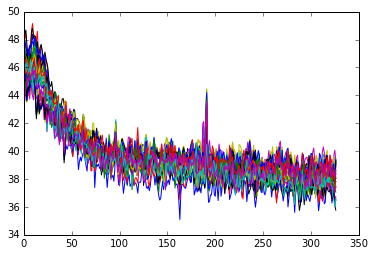

In [15]:
plt.plot(stc.data.T);

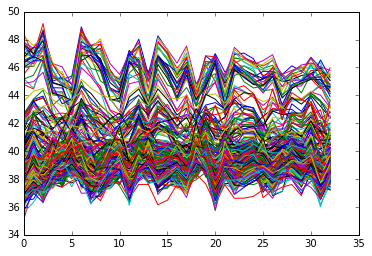

In [16]:
plt.plot(stc.data);

In [ ]:
# save
# stc.save('psd_dSPM')

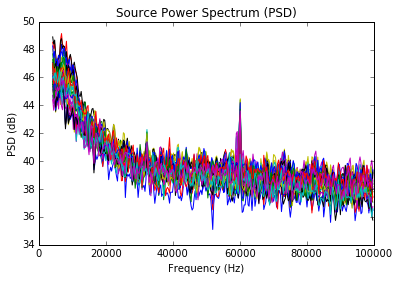

In [13]:
## view PSD of sources in label
plt.plot(1e3 * stc.times, stc.data.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Source Power Spectrum (PSD)')
plt.show()

### Reference
- https://martinos.org/mne/stable/auto_examples/time_frequency/plot_source_power_spectrum.html